In [48]:
import numpy as np
import tkinter as tk
from tkinter import scrolledtext
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, RepeatVector
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping

In [49]:
questions  =[]
answers = []
with open("C:/Users/Rames/anaconda file data/Project/Data set/dialogs.txt",'r') as f :
    for line in f :
        #print(line)
        line  =  line.split('\t')
        questions.append(line[0])
        answers.append(line[1])
print(len(questions) == len(answers))


True


In [50]:
import pandas as pd
df=pd.DataFrame({"Questions":questions,"Answers":answers})
df

,Questions,Answers
0,Hello,Hello\n
1,How are you?,I'm fine\n
2,Hii,Hello\n
3,Where are you from?,I am from Rajasthan\n
4,Language,"Python, java\n"
5,what is your name?,My name is RJ\n
6,Diploma centre name?,Ducate\n
7,Which your course?,Ai\n


In [51]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(questions + answers)

vocab_size = len(tokenizer.word_index) + 1
max_length = max([len(q.split()) for q in questions + answers])

In [52]:
tokenized_questions = tokenizer.texts_to_sequences(questions)
padded_questions = pad_sequences(tokenized_questions, maxlen=max_length, padding='post')

In [53]:
tokenized_answers = tokenizer.texts_to_sequences(answers)
padded_answers = pad_sequences(tokenized_answers, maxlen=max_length, padding='post')

In [54]:
decoder_output_data = np.array([to_categorical(data, num_classes=vocab_size) for data in padded_answers])

In [55]:
model = Sequential()
model.add(Embedding(vocab_size, 128, input_length=max_length, mask_zero=True))
model.add(LSTM(128))
model.add(RepeatVector(max_length))
model.add(LSTM(128, return_sequences=True))
model.add(Dense(vocab_size, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [56]:
history=model.fit(padded_questions, decoder_output_data, epochs=170)

Epoch 1/170
1/1 [==============================] - 15s 15s/step - loss: 3.3321 - accuracy: 0.0000e+00
Epoch 2/170
1/1 [==============================] - 0s 23ms/step - loss: 3.3238 - accuracy: 0.5000
Epoch 3/170
1/1 [==============================] - 0s 29ms/step - loss: 3.3150 - accuracy: 0.5000
Epoch 4/170
1/1 [==============================] - 0s 29ms/step - loss: 3.3053 - accuracy: 0.5000
Epoch 5/170
1/1 [==============================] - 0s 24ms/step - loss: 3.2941 - accuracy: 0.5000
Epoch 6/170
1/1 [==============================] - 0s 22ms/step - loss: 3.2809 - accuracy: 0.5000
Epoch 7/170
1/1 [==============================] - 0s 26ms/step - loss: 3.2653 - accuracy: 0.5000
Epoch 8/170
1/1 [==============================] - 0s 34ms/step - loss: 3.2465 - accuracy: 0.5000
Epoch 9/170
1/1 [==============================] - 0s 28ms/step - loss: 3.2240 - accuracy: 0.5000
Epoch 10/170
1/1 [==============================] - 0s 24ms/step - loss: 3.1966 - accuracy: 0.5000
Epoch 11/170
1/

1/1 [==============================] - 0s 24ms/step - loss: 0.8511 - accuracy: 0.6250
Epoch 84/170
1/1 [==============================] - 0s 26ms/step - loss: 0.8299 - accuracy: 0.6875
Epoch 85/170
1/1 [==============================] - 0s 27ms/step - loss: 0.8088 - accuracy: 0.7188
Epoch 86/170
1/1 [==============================] - 0s 33ms/step - loss: 0.7880 - accuracy: 0.7812
Epoch 87/170
1/1 [==============================] - 0s 19ms/step - loss: 0.7676 - accuracy: 0.8125
Epoch 88/170
1/1 [==============================] - 0s 22ms/step - loss: 0.7472 - accuracy: 0.8125
Epoch 89/170
1/1 [==============================] - 0s 23ms/step - loss: 0.7266 - accuracy: 0.7812
Epoch 90/170
1/1 [==============================] - 0s 22ms/step - loss: 0.7060 - accuracy: 0.8125
Epoch 91/170
1/1 [==============================] - 0s 30ms/step - loss: 0.6853 - accuracy: 0.8125
Epoch 92/170
1/1 [==============================] - 0s 19ms/step - loss: 0.6646 - accuracy: 0.8125
Epoch 93/170
1/1 [=====

1/1 [==============================] - 0s 26ms/step - loss: 0.0891 - accuracy: 0.9688
Epoch 166/170
1/1 [==============================] - 0s 23ms/step - loss: 0.0874 - accuracy: 0.9688
Epoch 167/170
1/1 [==============================] - 0s 18ms/step - loss: 0.0857 - accuracy: 0.9688
Epoch 168/170
1/1 [==============================] - 0s 22ms/step - loss: 0.0840 - accuracy: 0.9688
Epoch 169/170
1/1 [==============================] - 0s 29ms/step - loss: 0.0823 - accuracy: 0.9688
Epoch 170/170
1/1 [==============================] - 0s 16ms/step - loss: 0.0807 - accuracy: 0.9688


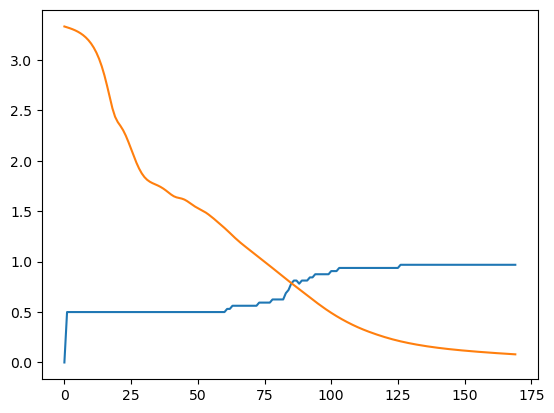

In [57]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']
epocs = range(len(acc))

plt.plot(epocs,acc)
plt.plot(epocs,loss)
plt.show()

In [ ]:
def send_message(event=None):
    user_input = entry_field.get()
    if user_input.strip() != "":
        chat_window.config(state=tk.NORMAL)
        chat_window.insert(tk.END, "You: " + user_input + "\n")
        chat_window.see(tk.END)
        entry_field.delete(0, tk.END)
        response = get_bot_response(user_input)
        chat_window.insert(tk.END, "Bot: " + response + "\n\n")
        chat_window.config(state=tk.DISABLED)
        chat_window.see(tk.END)

def get_bot_response(input_text):
    input_seq = tokenizer.texts_to_sequences([input_text])
    padded_input = pad_sequences(input_seq, maxlen=max_length, padding='post')
    predicted = model.predict(padded_input)[0]
    predicted_word_indices = np.argmax(predicted, axis=1)
    return tokenizer.sequences_to_texts([predicted_word_indices])[0]

root = tk.Tk()
root.title("Chatbot Ai")

chat_window = scrolledtext.ScrolledText(root, wrap=tk.WORD, width=40, height=15)
chat_window.pack(padx=10, pady=10)
chat_window.config(state=tk.DISABLED)

entry_field = tk.Entry(root, width=30)
entry_field.pack(padx=10, pady=5)
entry_field.bind("<Return>", send_message)

send_button = tk.Button(root, text="Send", command=send_message)
send_button.pack(padx=10, pady=5)

root.mainloop()

1/1 [==============================] - 0s 34ms/step
